<a href="https://colab.research.google.com/github/hotz1/JSC270_Assg2/blob/joey_branch/JSC270_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries you'll likely need

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

###Importing data

In [131]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, sep=",")
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

income94.shape

(32561, 15)

Using the `.shape` function, we can see that the `income94` dataset is 32561x15, i.e. the dataset has 32561 rows and 15 columns. These 32561 rows represent individual people in the census, and each of the 15 columns represents an observation about that person.

###Exploring the Data:

In [132]:
# This command is used to see the different types of data in the dataframe. We can see that of the 15 columns described above, 6 of them contain 
# numerical values (integer values) and the other 9 contain object values, which generally signify categorical data.

# Looking at the .head() of the data above, we see that there are 6 columns (age, education_num, capital_gain, capital_loss, hours_per_week) which are 
# numerical, and the remaining 9 columns store categorical variables. This lined up with the information shown by this command.
print(income94.info())
print('\n')
income94.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None




,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Using the `.info()` function allows us to see a broad overview of the different types of data in our dataframe. As we can see, the "non-null count" for each column is 32561 entries, which is the total number of rows in our dataset, as we saw by calling the `shape` function earlier. 

However, this does not necessarily mean that the entire dataset is usable, as missing values may ne recorded under a different non-null entry.

The `.head()` function allows us to get a better look at our data, and see the different types of data which are in each of the columns, but it still is only showing a tiny proportion of our dataset.

### Looking for missing observations
Now that we have done some initial exploring of the data, we would like to see if there are any missing observations which could potentially cause errors in our analysis.

As we saw in an earlier block of executed code, there are 32561 non-null values in each row. 
Since there are 32561 non-null values in each row, we do not have any blank spaces where there should be data; nor do we have any `NaN`'s in our dataset where there should be an actual number.

In [133]:
# The following loop is used to ensure that the columns are as we expected them to be, and that they contain the right information.
# This loop also tries to present the information in a somewhat readable format by spacing out the different observations.

for col in income94.columns:
  print("Observation Column: " + col)
  print(income94[col].value_counts())
  print('\n')

Observation Column: age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64


Observation Column: workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


Observation Column: fnlwgt
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64


Observation Column: education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Do

###Fixing Missing Observations:
We see that there are some missing observations in some of the columns which store categorical data. These missing observations are denoted with `?` characters in the dataframe.

In particular, there are 1836 missing observations in the `workclass` column, 1843 missing observations in the `occupation` column, and 583 missing observations in the `native_country` column.

In [134]:
# This block of code replaces the question marks that mark a lack of an answer with a "NaN" character, which marks that there is no relevant data present in this observation.
income94 = income94.replace(' ?', np.NaN)
# This is a check to ensure that all of the ? characters have been properly replaced with null characters. 
# These results match our expected amount of missing observations from above, so we're good to go! 
income94.isnull().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

###Distributions of Capital Gains and Losses:

In the following lines of code, we will create histograms which show the capital gains and losses of the people in this census.

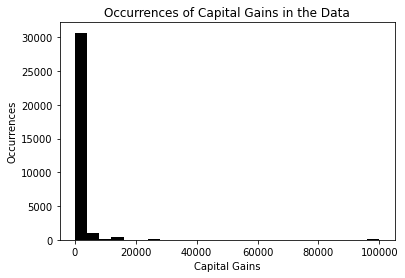

In [135]:
# Creates a histogram for the capital gains 
plt.hist(income94['capital_gain'], bins = 25, color="black") # Monetary gains are referred to as being "in the black"
plt.title('Occurrences of Capital Gains in the Data')
plt.xlabel('Capital Gains')
plt.ylabel('Occurrences')
print('') # This avoids the 'Occurrences' label from also being displayed as a text object, since I found that annoying.

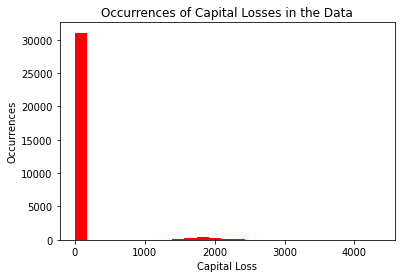

In [136]:
# Creates a histogram for the capital losses 
plt.hist(income94['capital_loss'], bins = 25, color="red") # Monetary losses are referred to as being "in the red"
plt.title('Occurrences of Capital Losses in the Data')
plt.xlabel('Capital Loss')
plt.ylabel('Occurrences')
print('') # This avoids the 'Occurrences' label from also being displayed as a text object, since I found that annoying.

###Summary of these Distributions: 
As we can see from the above two histograms, a vast majority of the observations (people) in the `income94` dataset which we are working with have no capital gains, and no capital losses.

Note that these groups do not necessarily overlap entirely, but in both cases, a majority of the people have no changes in capital.

In the initial data exploration above (glimpses at the values in each column), we saw that 29849 people had 0 capital gains, and 31042 people had 0 capital losses.

Thus, it would be best to create new categorical variables which declare whether or not the person in question has any capital gains or losses.

In [137]:
# Creates a helper function which can be used to determine whether a person has capital gains/losses or not. Since capital losses are registered
# as positive numbers in the dataset, the person has gains/losses if and only if the value in the corresponding column is positive.
def isPositive(value):
  return value > 0

# Creates two new variables in the dataframe which declare whether or not the person has any capital gains or losses.
income94['has_capital_gains'] = isPositive(income94['capital_gain'])
income94['has_capital_losses'] = isPositive(income94['capital_loss'])

# Based on these four outputs, we can see that there are an equal amount of "0" entries in each of the columns as "False" values in the corresponding columns.
print(income94['capital_gain'].value_counts())
print("\n")
print(income94['has_capital_gains'].value_counts())
print("\n")
print(income94['capital_loss'].value_counts())
print("\n")
print(income94['has_capital_losses'].value_counts())

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital_gain, Length: 119, dtype: int64


False    29849
True      2712
Name: has_capital_gains, dtype: int64


0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital_loss, Length: 92, dtype: int64


False    31042
True      1519
Name: has_capital_losses, dtype: int64


Since the amount of false entries are equal to the amount of 0 entries in the corresponding columns for capital gains and losses, we can see that there newly-declared variables match our expectation. 

###The Weight Parameter in the Data



####Initial Spread of Weights
In order to better understand the `fnlwgt` variable in the dataset, it would help to create a histogram of the data so that we may see the spread of this variable over our dataset.

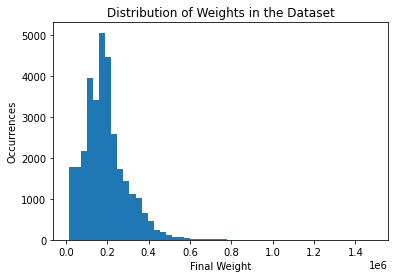

In [138]:
# Creates a histogram for the final weights of the different rows of the data 
plt.hist(income94['fnlwgt'], bins = 50)
plt.title('Distribution of Weights in the Dataset')
plt.xlabel('Final Weight')
plt.ylabel('Occurrences')
print("")

Clearly, the weights are not symmetrically distributed. Note that the scale of the x-axis is in millions, so a majority of the data is actually in the range from 0 to 800000, as opposed to being in the range from 0 to 0.8.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f36be5876a0>,
      dtype=object)

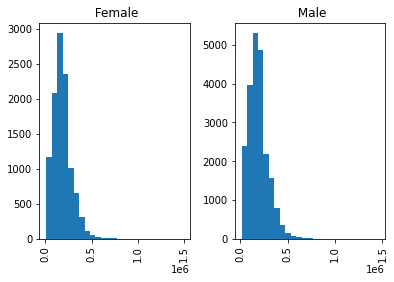

In [139]:
income94['fnlwgt'].hist(by=income94['sex'], bins = 25)

As we can see above, the distribution of the weight parameters is quite similar (in shape) regardless of sex. Note that there are significantly more males than females in the dataset, as the range of occurrences for males significantly exceeds the amount of occurrences for  exceeds the range for females, and the distributions are similarly shaped.

####Outliers in the Weights

Next, we should look to see if there are any outliers in our data. From the distributions plotted above, we can see that a majority of the weights are approximately in the range from 0 to 300000, and a small amount of them are in the range above 300000.

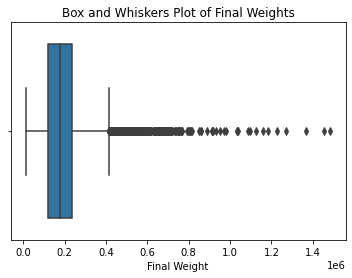

In [140]:
sns.boxplot(x = 'fnlwgt', data = income94)
plt.xlabel('Final Weight')
plt.title('Box and Whiskers Plot of Final Weights')
plt.show()

From this box and whisker plot, we can see that all of the outlier weights are large, as opposed to having the outliers distributed on 'both sides' of the data.

This box-and-whisker plot uses the 'standard' definition of an outlier, which is 1.5 inter-quartile ranges (IQR) away from the first/third quartile.

We can easily find the observations in our data which contain outliers. However, we will not remove the outliers from the dataset, even though all of them are distributed to the same side of the data.

Removing the weights which are outliers is not a good idea for multiple reasons, including:
- The formula for the 'weight' of a person is not clearly outlined, so we do not know which observations will be removed
- People with similar demographic characteristics will have similar weights, so we may be removing smaller or marginalized groups entirely from the data, because a higher demographic weight could correspond to a statistic such as older people or people of a certain race.
- The weight parameter is meant to represent the overall population of a person matching those characteristics, so a set of characteristics whose `fnlwgt` is an outlier would in fact be more common than those with lower values of `fnlwgt`.

In [141]:
# This function is the get_outliers function which we used in the Week 2 Lab for this course.
# It uses the 1.5IQR definition of an outlier for a numerical variable to determine the outliers of the data.
def get_outliers(num_var, df):
  '''Get outliers based on whiskers from 
  boxplot.
  Input - num_var: A string representing the v
  variable of interest
  df: The pd df containing the numerical data
  Output: A pd df containing the outlier obs
  '''
  # Capture 1st and 3rd quartiles
  firstquart = df[num_var].quantile(q=0.25)
  thirdquart = df[num_var].quantile(q=0.75)
  # Generate IQR
  iqr = thirdquart - firstquart
  # Generate Whiskers
  lower_whisker = firstquart - 1.5*iqr
  upper_whisker = thirdquart + 1.5*iqr
  # Gen outlier df
  outliers = df[(df[num_var] > upper_whisker) | (df[num_var] < lower_whisker)]
  print('The variable {} has {} outliers'.format(num_var, len(outliers)))
  return outliers

fnlwgt_outliers = get_outliers('fnlwgt', income94)
print("Distribution of race among the entire dataset:")
print(fnlwgt_outliers.value_counts('race'))
print("\nDistribution of race amount the outliers (based on weight):")
print(income94.value_counts('race'))

The variable fnlwgt has 992 outliers
Distribution of race among the entire dataset:
race
 White                 772
 Black                 211
 Other                   4
 Asian-Pac-Islander      4
 Amer-Indian-Eskimo      1
dtype: int64

Distribution of race amount the outliers (based on weight):
race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
dtype: int64


As we can see in the above tables, approximately 21.3% of the people who are marked as outliers based on weight identified as Black, compared to only 9.6% of the dataset as a whole. This reinforces our idea to not remove these outliers from the data, as it would skew our data towards non-Black people by removing many Black people from the data.

### Correlations in the Data:

Now that we have finished doing our initial setup of the dataset, we can begin to do the actual analysis.

First, we would like to observe the correlations between the variables `age`, `education_num`, and `hours_per_week`. We can use a correlation matrix to easily see all of these values at once.

In [142]:
# Creates a new dataframe consisting of only the columns listed above
correlation_data = income94[['age', 'education_num', 'hours_per_week']]
correlation_data.corr()

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


###Statistical Testing of Correlation

Based on the correlation matrix above, we see that these three variables all have very slight positive correlations. Since we are setting our threshold of correlation to 0.1, we will look to see if there is any correlation between `education_num` and `hours_per_week`, and disregard the other 2 pairings.

 Note that by the definition of correlation, all (non-constant) variables must have a perfect correlation coefficient with themselves, so the diagonal entries are not significant.

Now, we can to create a regression of these two variables, and see if there is any correlation between them. 

We will do this through the principles of hypothesis testing; we will assume that there is no (legitimate) correlation between these variables and that the 0.148 correlation coefficient is due to chance alone, and use the t-statistic to determine whether this hypothesis is reasonable.

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     730.4
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          4.24e-159
Time:                        23:16:23   Log-Likelihood:            -1.2768e+05
No. Observations:               32561   AIC:                         2.554e+05
Df Residuals:                   32559   BIC:                         2.554e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        33.2711      0.274    121.575

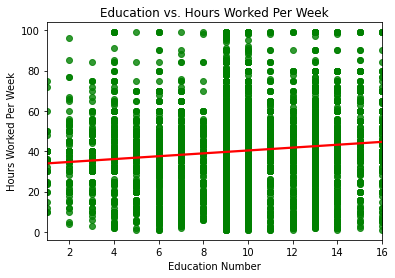

In [143]:
hours_education_regression = smf.ols('hours_per_week ~ education_num', data = income94).fit()
print(hours_education_regression.summary())
hours_education_plot = sns.regplot(x="education_num", y="hours_per_week", data=income94, scatter_kws={"color": "green"}, line_kws={"color": "red"})
hours_education_plot.set_xlabel("Education Number")
hours_education_plot.set_ylabel("Hours Worked Per Week")
hours_education_plot.set_title("Education vs. Hours Worked Per Week")
plt.show()

As we can see from the visualization created, there is a slight positive trend when we graph `education_num` and `hours_per_week`, which we would expect with a correlation coefficient of approximately 0.148.

From the regression summary printed above the graph, we see that the equation of the red line which was computer for the regression is:
```
hours_per_week = 33.2711+0.7109*education_num
```
For both the intercept and the coefficient corresponding to `education_num`,we see that the values in the `P>|t|` columns are identically 0.

Although these values cannot be precisely 0, this indicates that there is a very minute chance of this pattern being merely due to chance or external factors, and thus, we can reject the null hypothesis that these variables are not correlated.


### Controlling for Sex

In the dataframe, there are many categorical variables which we can explore. One such variable is the reported sex of the people in the census data. We may be interested in seeing if there are different patterns in the correlation between certain factors when we control for the sex of the people.

We will be looking at the correlation between age and education, separated by sex. One might expect that as age increases, people are more likely to be educated, since they will have had more time to complete their education if they so choose (e.g. very few 20-year olds have finished an undergraduate degree). This expectation would yield some form of positive correlation between these variables, as one would expect people who have had more formal education to be older.

In [144]:
# These two lines of code create two new dataframes which are restricted to either just the males or females in the overall data which we have.
# Using these two dataframes, we can find correlations of the variables which account for sex, and see if there are noticeable differences in the correlations of 
# certain variables based on the sexes of the people in the data.

# Additionally, since we are only interested at looking at the correlations between certain variables, we will remove some of the variables from these new dataframes to avoid clutter.

income94_males = income94[income94['sex'] == ' Male'][['age', 'education_num', 'hours_per_week']]
income94_females = income94[income94['sex'] != ' Male'][['age', 'education_num', 'hours_per_week']]

print("Correlation of age, education, and hours worked per week for males:")
print(income94_males.corr())
print("\nCorrelation of age, education, and hours worked per week for females:")
print(income94_females.corr())

Correlation of age, education, and hours worked per week for males:
                     age  education_num  hours_per_week
age             1.000000       0.060486        0.034124
education_num   0.060486       1.000000        0.136782
hours_per_week  0.034124       0.136782        1.000000

Correlation of age, education, and hours worked per week for females:
                     age  education_num  hours_per_week
age             1.000000      -0.017899        0.081257
education_num  -0.017899       1.000000        0.178749
hours_per_week  0.081257       0.178749        1.000000


From the above tables, we can see that there is a slight positive correlation between education and age for males, and there is actually a very slight negative correlation between age and education for females in the data.

A possible explanation for these correlations could be societal trends; females tended to not seek higher education as often as males did in the past, since there was sometimes an expectation of them to become stay-at-home mothers, as opposed to working. This would cause the older generation of females in the dataset to have not sought further education, which could yield a negative correlation between age and education for females.

However, males would not be affected by these societal norms, which is why the data for males more closely represents the intuition of education and age having some positive correlation.

### Calculation of Weighted and Unweighted Variances
Lastly, we would like to find the covariance and variance of the variables `education_num` and `hours_per_week` in the dataset. We want to find both the weighted and unweighted quantities for these measures.

In [145]:
unweighted_variances = np.cov(income94['hours_per_week'], income94['education_num'])
print("Unweighted variance of education_num: {}".format(unweighted_variances[0][0]))
print("Unweighted mean of education_num: {}".format(np.average(income94['education_num'])))
print("Unweighted variance of hours_per_week: {}".format(unweighted_variances[1][1]))
print("Unweighted mean of hours_per_week: {}".format(np.average(income94['hours_per_week'])))
print("Unweighted covariance of education_num and hours_per_week: {}".format(unweighted_variances[1][0]))
print("\n")

weighted_variances = np.cov(income94['hours_per_week'], income94['education_num'], aweights=income94['fnlwgt'])
print("Weighted variance of education_num: {}".format(weighted_variances[0][0]))
print("Weighted mean of education_num: {}".format(np.average(income94['education_num'], weights=income94['fnlwgt'])))
print("Weighted variance of hours_per_week: {}".format(weighted_variances[1][1]))
print("Weighted mean of hours_per_week: {}".format(np.average(income94['hours_per_week'], weights=income94['fnlwgt'])))
print("Weighted covariance of education_num and hours_per_week: {}".format(weighted_variances[1][0]))

Unweighted variance of education_num: 152.45899505045412
Unweighted mean of education_num: 10.0806793403151
Unweighted variance of hours_per_week: 6.618889907032914
Unweighted mean of hours_per_week: 40.437455852092995
Unweighted covariance of education_num and hours_per_week: 4.705337944611544


Weighted variance of education_num: 146.33651738876418
Weighted mean of education_num: 10.018874787555482
Weighted variance of hours_per_week: 6.828921139768938
Weighted mean of hours_per_week: 40.308570376806905
Weighted covariance of education_num and hours_per_week: 4.634074756568678


We can see that once we take into account the weights in the dataset, there is a slight decrease in the variance and mean of `education_num`, and a slight increase in the variance of `hours_per_week`, but a decrease in the weighted mean of `hours_per_week`.

Since `education_num` has a slight reduction in variance both variance and mean once we take the weights into account, it would appear as if the unweighted data has a slight overrepresentation of people who are highly educated compared to the 'true average'. A reduction in variance (and hence reduced standard deviation) implies that we likely have a couple too many outliers which are skewing the values in the `education_num` data upwards, and using weights helps to counteract this.

Because `hours_per_week` has a slight decrease in its mean once we take into account the weights, it seems that our data would skew towards people whose work hours are in excess of the true average. However, the weighted variance is actually larger than the unweighted variance, which means that our data is more spread out when weighted than unweighted, which means that there is likely an underrepresentation of people whose work hours are both well above the mean and well below the mean.

### Using Linear Regressions!
We can create some linear regressions to create lines of best fit for variables in our data.

First, let us look at the amount of hours worked per week relative to the sex of the person, to see if there is a notable difference in hours per week for the sexes.


In [146]:
# Creates a regression of hours worked per week relative to sex.
reg2 = smf.ols('hours_per_week ~ sex', data = income94).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:16:26   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4104      0.116    314.412   

In the statistics for the above linear regression, we see that the sex of the person involved is the dependent variable, and the hours worked per week is the independent variable.

Based on the coefficients which were calculated above, we see that the approximate formula for the line of best fit for these data is 
```
hours_per_week = 36.4104 + 6.0177*sex
```
where `sex` is a variable which is equal to 0 is the person is female, and 1 if the person is male.

Since there is a positive coefficient for 'being male', we can thus say that there is a net increase in the amount of hours worked per week by males as opposed to by females, and thus, we can conclude that males tend to work more hours than females.



In [147]:
print("Average amount of hours worked by females: {}".format(np.average(income94_females['hours_per_week'])))
print("Average amount of hours worked by males: {}".format(np.average(income94_males['hours_per_week'])))

Average amount of hours worked by females: 36.410361154953115
Average amount of hours worked by males: 42.42808627810923


As we can see from the above code output, the average amount of hours worked by females in this dataset is 36.41 hours per week, and the average amount of hours worked by men is 42.43 hours per week, which matches our conclusions drawn from the regression table above.

In fact, we see that the 'intercept' of this line is precisely the average amount of hours worked by women, and that the coefficient for men is precisely the difference between the means.

This, of course, is because we essentially only have 2 data points (one per sex), and we can always create a line between two points.

Since our dataset contains a lot of information, we can do better than merely computing the equation of a line which best fits two data points. We will introduce some controlled variables, such as the level of education of the people in the sample.

In [148]:
reg3 = smf.ols('hours_per_week ~ sex + education_num', data = income94).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:16:26   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

Based on the above regression table, we can see that the value of `education_num` does affect the amount of hours worked per week, on top of the sex of the person.

Based on the probabilities given in the t-table, both variables (`sex` and `education_num`) are correlated with `hours_per_week` when using any notable level of significance, since the probability of these variables being uncorrelated (i.e. the true slope is equal to 0) is less than 0.005 (since it was rounded down to 0.000)

From this regression table, we can derive the formula of the best fit which takes into account these variables, which is 
```
hours_per_week = 29.4106+5.9709*sex+0.6975*education_num
```
where `sex` = 0 for females, and 1 for males, as mentioned earlier.

Note that `education_num` is not necessarily linear. For example, the difference between `education_num == 6` and `education_num == 7` is the difference between 10th and 11th, which is typically only one year of education, whereas the difference between `education_num == 13` and `education_num == 14` is the difference between a Bachelor's degree and a Master's degree, which is often a 2-year program.

Although `education_num` is positively correlated with `hours_per_week`, it may be better to instead look at the amount of time which the person spent in formal education in general, instead of only this ordinal number, since the breakpoints between these values do not represent even amounts of time.

Next, we will include a third variable, which is the gross income group (above or below $50,000 USD per year) as a variable which can help predict the value of `hours_per_week`.

In [149]:
reg4 = smf.ols('hours_per_week ~ gross_income_group + sex + education_num', data = income94).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:16:26   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Based on the above regression table, we can see that the value of `gross_income_group` does affect the amount of hours worked per week, on top of the sex of the person.

Based on the probabilities given in the t-table, the three variables (`sex`, `gross_income_group` and `education_num`) are all likely to be correlated with `hours_per_week` when using any notable level of significance, since the probability of the 'true slope' of the coefficients for these variables being 0 is very small.

From this regression table, we can derive the formula of the best fit which takes into account these variables, which is 
```
hours_per_week = 31.4218+5.1010*sex+0.4478*education_num+4.5175*gross_income_group
```
where `sex` = 0 for females, and 1 for males, as mentioned earlier, and `gross_income_group` = 0 for people who made up to \$50,000, and 1 for people who made greater than \$50,000.

### Choosing Models

In the previous section, we created three linear regression models for the variable `hours_per_week` in terms of the variables `sex`, `gross_income_group`, and `education_num`.

We would like to decide upon some criteria to help us decide which of the three models would be the best models. In my opinion, I would personally choose the model with all three variables as potential predictors.

The models with 1, 2, and 3 variables had R-squared values of 0.053, 0.074, and 0.094 respectively. As we can see, an increase in the number of variables increases the amount of variation which our model is able to explain. Since we are sing more input data, this is to be expected, and we may be concerned with overfitting our model, and overcomplicating it.

Note that of the three independent variables listed above, two of them (`sex` and `gross_income_group`) are binary variables, so the model is not made significantly more complex, as we only need to add constants to our predicted value if a certain condition is met, as opposed to having to multiply and add.

This keeps the 3-variable model relatively simple, as we can essentially think of it as 4 different parallel lines, one for each possible combination of `sex` and `gross_income_group`, and we know that simple linear regressions are easy to work with.

Overfitting the data may be a concern, but due to the overall low r-squared value, we should not worry too much about the prospect of overfitting our model, since a large amount of the variance in `hours_per_week` is still not explained, even by these 3 variables.

Another concern may be that there is some correlation between these variables which may confound the data and cause a bit of a feedback loop, such as the fact that males had a higher correlation with `education_num` than females did by age. Although this potentially may cause problems, the change in the coefficients of the models can help to prevent this, and we still notice significant increases in the R-squared value of these regressions when including more variables.

Although it may be problematic at times and it less simple to work with than the single-variable model, I believe that of the three models created above using linear regressions, the 3-variable model is the best to use, due to its higher R-squared value.

### Model Fitting

Suppose that we wanted to create a different model for `hours_per_week` using linear regression. One way which we could do this process is through model fitting.

In particular, we could start with a model which takes in no inputs, and returns an estimate of `hours_per_week`, i.e. a constant function.

From there, we could try and create a model which uses 1 variable, where each variable is a choice of one of the other variables in our dataframe, so that we can test all of the possible variables as predicotrs for `hours_per_week`. Once we have created a univariate model for each variable, we can select whichever variable minimizes the RSS of the model, and use that as our initial variable.

Once we have selected an initial variable for our model, we can try and create a stronger multilinear model by testing out the remaining variables as possible predictors for our data, alonside the first variable.

In theory, we can continue this process until all of our variables are exhausted. However, we would clearly be overfitting the data by that point, since that would essentially just be a lookup table which gives us the value of `hours_per_week` corresponding to the other entries.

We should create a stopping point after which we will not use any more variables in our data, to avoid overfitting and overcomplication. 

One possible threshold could be requiring a certain ratio of R-squared values between the model with n+1 variables and the model with n variables, such as a rule that says that we will only add a new variable if the R-squared value is at least 1.2x the previous R-squared value. Note that this process does create an upper bound for the amount of variables, since the R-squared value of any model is bounded above by 1. 

This model fitting procedure could help us create a model for our data by ensuring that we have chosen the best combination of variables given the amount of variables which we want to select as potential predictors, while also ensuring that we do not overfit or overcomplicate the model.